## **Classification Algorithms**

Prediction of data which is *not numerical*.

By using confusion matrix, we can eveluate success of classification algorithm.


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Logistic Regression Algorithm

In [ ]:
# use veriler.txt
uploaded = files.upload()

Saving veriler.txt to veriler.txt


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['veriler.txt']))
print("Done")

In [ ]:
# independent variables
x = data.iloc[:,1:4].values
# dependent variables
y = data.iloc[:,4:].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.33,
                                                    random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(x_train)
# only transform do not learn (no fit!)
X_test = sc.transform(x_test)


from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)

y_prediction = logr.predict(X_test)
print("Prediction values:")
print(y_prediction)
print("Real values:")
print(y_test)

Prediction values:
['e' 'e' 'e' 'e' 'k' 'e' 'e' 'e']
Real values:
[['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Confusion Matrix



A confusion matrix's diagon always gives true results. 

Sensitivity = t-pos/(t-pos + f-neg)
True positive recognition rate

Specificity = = t-neg/(t-neg + f-pos)
True negative recognition rate

Precision = = t-post/(t-pos + f-pos)

Accuracy = (sensitivity X pos/(pos + neg)) + (specificity X neg/(pos + neg))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
print(cm)

# accuracy = 1/8 (8 examples, 1 true)
# error rate = 1 - accuracy = 7/8 

[[0 1]
 [7 0]]


# Lazy And Eager Learning

**LAZY LEARNING**: Model predicts after new data comes. (for big data lazy learning can be more sensible, since it is cost effective)

**EAGER LEARNING**: Model predicts before data comes. (calculates probability before) (takes more calculation time)

# KNN Algorithm (K Nearest Neigboors)

[Bilgisayar Kavramları Explanation](https://bilgisayarkavramlari.com/2008/11/17/knn-k-nearest-neighborhood-en-yakin-k-komsu/)

[KNN Sklearn Documentation](https://scikit-learn.org/stable/modules/neighbors.html)

Uses euclidien distance (like measuring with ruler) for distance. This can create problems because, maybe one of variable is changing more than other for this, there is modified KNN algorithms.

There are different distance metrics like manhattan, minkowski, mahalanobis...

Closer neigboor is important.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train, y_train)

y_prediction = knn.predict(X_test)
print(y_prediction)
print(y_test)

cm = confusion_matrix(y_test, y_prediction)
print(cm)

# for 5 neigbors and 1 neigbor confusion matrix is:
#   5: [0 1]                   1: [1 0]
#      [6 1]                      [1 6]
# we can see that 1 neigbor is more succesfull than 5 neigbor,
# not always more neigbor is better!

['k' 'k' 'e' 'k' 'e' 'k' 'k' 'k']
[['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']]
[[1 0]
 [1 6]]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Support Vector Machine

[SVC Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

**SVM Kernel Trick**


Helps us to solve non-linear problems.

for 2D data set, we create 3rd dimension to seperate classes

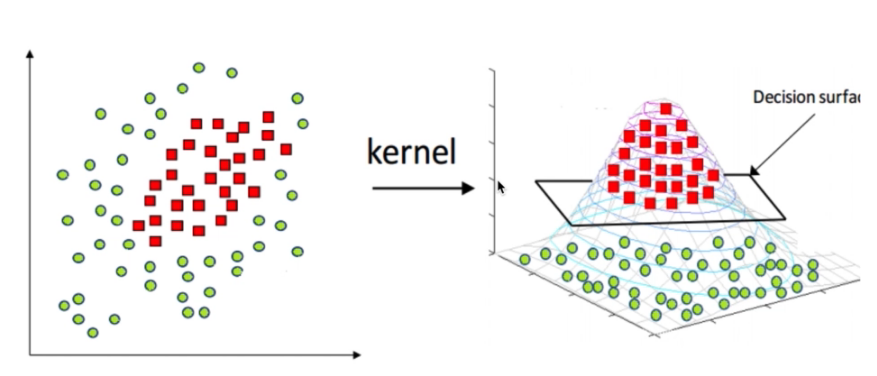

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_prediction = svc.predict(X_test)
print(y_prediction)

cm = confusion_matrix(y_test, y_prediction)
print(cm)

['e' 'e' 'e' 'e' 'k' 'e' 'e' 'k']
[[0 1]
 [6 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Naive Bayes (Conditional Probability)

It can work with unbalanced datasets.

Gaussian, Multinominal, Bernouilli are core naive bayes methods.

- Gaussian: If data has continious values. (0.1, 2.587...)

- Multinominal: If data is nominal. (Which car, university...)

- Bernouilli: If data is binomial. (man-woman, eats-not goes...)



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_prediction = gnb.predict(X_test)
print(y_prediction)

cm = confusion_matrix(y_test, y_prediction)
print(cm)

['e' 'e' 'e' 'e' 'k' 'e' 'e' 'k']
[[0 1]
 [6 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Tree

We have 2 different approach:

We can use majority vote. (we may skip some important details.)

We can divide space more. (can cause overfitting.)

---

We will use Quinlan's ID3 algorithm greedy algorithm for classification. For selecting which independent variable will decision tree start, we will use information gain (entropy)

Explained well in BTK Course: 16.1 after 10:00

---

Alternatives for ID3, c4.5

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
# Difference between gini and entropy:
# same info(D) function, only log base value is different.

dtc.fit(X_train, y_train)

y_prediction = dtc.predict(X_test)
print(y_prediction)

cm = confusion_matrix(y_test, y_prediction)
print(cm)

['e' 'k' 'k' 'k' 'e' 'k' 'k' 'k']
[[1 0]
 [1 6]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')

rfc.fit(X_train, y_train)

y_prediction = rfc.predict(X_test)
print(y_prediction)

cm = confusion_matrix(y_test, y_prediction)
print(cm)

# In every run, confusion matrix give different results.
# Need to optimize parameters

['k' 'k' 'k' 'k' 'e' 'k' 'k' 'k']
[['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']]
[[1 0]
 [0 7]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


# ZERO R ALGORITHM (ACCURACY PARADOX) 

Says that accuracy not always ensure success.

# ROC

BTK video 18.4 important! In video it's explained that which algorithm should we choose after eveluated accuracies.